In [3]:
import requests
from pyspark.sql import SparkSession
spark = SparkSession.builder \
.appName("rplace")\
    .config("spark.plugins", "com.nvidia.spark.SQLPlugin") \
    .config("spark.rapids.sql.enabled", "true") \
    .config("spark.rapids.sql.exec.CollectLimitExec", "true") \
    .config("spark.jars", "/home/paras/anaconda3/envs/rapids-24.12/spark-3.4.4-bin-hadoop3/jars/rapids-4-spark_2.12-24.12.1.jar")\
    .getOrCreate()
spark
from pyspark.sql.functions import split, col
import pyspark.sql.functions as sf
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import time
import pandas as pd
print(spark.conf.get("spark.rapids.sql.enabled"))


25/02/27 12:42:45 WARN Utils: Your hostname, para7ite resolves to a loopback address: 127.0.1.1; using 192.168.1.4 instead (on interface wlp6s0)
25/02/27 12:42:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
25/02/27 12:42:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/27 12:42:46 WARN RapidsPluginUtils: RAPIDS Accelerator 24.12.1 using cudf 24.12.1, private revision 874fe2a69931879dc50faad111280e8ca75467cc
25/02/27 12:42:46 WARN RapidsPluginUtils: RAPIDS Accelerator is enabled, to disable GPU support set `spark.rapids.sql.enabled` to false.
25/02/27 12:42:46 WARN RapidsPluginUtils: spark.rapids.sql.explain is set to `NOT_ON_GPU`. Set it to 'NONE' to suppress the diagnostics logging about the query placement on the GPU.


true


In [4]:
spark

In [6]:
url='https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-0000000000'
currDir=os.getcwd()
save_path=currDir+r"/rplace_csv"
total_files_taken =52
number_list = [f"{i:02}" for i in range(total_files_taken+1)]
rplace=None
response=None
files=[]
parquet_files=[]

for num in number_list:
    download_url=url+num+'.csv.gzip'
    save_file=save_path+'/'+num+'.csv.gz'
    save_file_parquet=save_path+'/'+num+'.parquet'
    files.append(save_file)
    parquet_files.append(save_file_parquet)
    
    if os.path.exists(save_file)==False:
        response=requests.get(download_url)
        with open(save_file,'wb') as file:
                  file.write(response.content)
            
    if os.path.exists(save_file_parquet)==False:
        temp=spark.read.csv(save_file,header=True,inferSchema=True)
        temp.write.parquet(save_file_parquet,mode="overwrite")
        
rplace=spark.read.parquet(*parquet_files)

    

In [7]:
print(rplace.count())


132224375


In [11]:
data = [
    ("#6B0119", 107, 1, 25),
    ("#244FA4", 36, 79, 164),
    ("#6D462F", 109, 70, 47),
    ("#BD0037", 189, 0, 55),
    ("#3790EA", 55, 144, 234),
    ("#9B6926", 155, 105, 38),
    ("#FF4500", 255, 69, 0),
    ("#52E8F3", 82, 232, 243),
    ("#FEB470", 254, 180, 112),
    ("#4839BF", 72, 57, 191),
    ("#000000", 0, 0, 0),
    ("#FFD435", 255, 212, 53),
    ("#695BFF", 105, 91, 255),
    ("#525252", 82, 82, 82),
    ("#94B3FF", 148, 179, 255),
    ("#888D90", 136, 141, 144),
    ("#01A267", 1, 162, 103),
    ("#801D9F", 128, 29, 159),
    ("#09CC76", 9, 204, 118),
    ("#B449BF", 180, 73, 191),
    ("#7EEC57", 126, 236, 87),
    ("#02756D", 2, 117, 109),
    ("#DD117E", 221, 17, 126),
    ("#009DAA", 0, 157, 170),
    ("#FE3781", 254, 55, 129),
    ("#FE99A9", 254, 153, 169),
    ("#E5A800", 229, 168, 0),
    ("#803F79", 128, 63, 121),
    ("#4C8C32", 76, 140, 50),
    ("#FF6C00", 255, 108, 0),
    ("#F1E800", 241, 232, 0),
    ("#11F1A0", 17, 241, 160)
]
columns = ["hex", "r", "g", "b"]
color_palette = spark.createDataFrame(data, columns)

color_palette.write.parquet("cp.parquet",mode="overwrite")
color_palette_parquet = spark.read.parquet("cp.parquet")

25/02/27 12:43:42 WARN GpuOverrides: 
    ! <RDDScanExec> cannot run on GPU because GPU does not currently support the operator class org.apache.spark.sql.execution.RDDScanExec
      @Expression <AttributeReference> hex#464 could run on GPU
      @Expression <AttributeReference> r#465L could run on GPU
      @Expression <AttributeReference> g#466L could run on GPU
      @Expression <AttributeReference> b#467L could run on GPU



In [13]:
rplace_distinct_rgb = rplace_distinct.withColumn("r",sf.conv(col("pixel_color").substr(2,2),16,10).cast("int"))\
                                   .withColumn("g",sf.conv(col("pixel_color").substr(4,2),16,10).cast("int"))\
                                   .withColumn("b",sf.conv(col("pixel_color").substr(6,2),16,10).cast("int"))
rplace_distinct_rgb.write.parquet("cp.parquet",mode="overwrite")
color_palette_parquet = spark.read.parquet("cp.parquet")

25/02/27 12:44:39 WARN GpuOverrides: 
  !Exec <HashAggregateExec> cannot run on GPU because not all expressions can be replaced
    @Expression <AttributeReference> pixel_color#3 could run on GPU
    @Expression <AttributeReference> pixel_color#3 could run on GPU
    @Expression <Alias> cast(cast(conv(substring(pixel_color#3, 2, 2), 16, 10, false) as int) as string) AS r#567 could run on GPU
      @Expression <Cast> cast(cast(conv(substring(pixel_color#3, 2, 2), 16, 10, false) as int) as string) could run on GPU
        @Expression <Cast> cast(conv(substring(pixel_color#3, 2, 2), 16, 10, false) as int) could run on GPU
          !Expression <Conv> conv(substring(pixel_color#3, 2, 2), 16, 10, false) cannot run on GPU because the Expression Conv has been disabled, and is disabled by default because GPU implementation is incomplete. We currently only support from/to_base values of 10 and 16. We fall back on CPU if the signed conversion is signalled via a negative to_base. GPU implementati

+-----------+---+---+---+
|pixel_color|  r|  g|  b|
+-----------+---+---+---+
|    #B44AC0|180| 74|192|
|    #FF4500|255| 69|  0|
|    #FFFFFF|255|255|255|
|    #FFD635|255|214| 53|
|    #000000|  0|  0|  0|
|    #3690EA| 54|144|234|
|    #00A368|  0|163|104|
|    #FFA800|255|168|  0|
|    #7EED56|126|237| 86|
|    #D4D7D9|212|215|217|
|    #FF99AA|255|153|170|
|    #2450A4| 36| 80|164|
|    #51E9F4| 81|233|244|
|    #898D90|137|141|144|
|    #9C6926|156|105| 38|
|    #811E9F|129| 30|159|
|    #00CC78|  0|204|120|
|    #FF3881|255| 56|129|
|    #493AC1| 73| 58|193|
|    #00756F|  0|117|111|
+-----------+---+---+---+
only showing top 20 rows

+-----------+---+---+---+
|pixel_color|  r|  g|  b|
+-----------+---+---+---+
|    #B44AC0|180| 74|192|
|    #FF4500|255| 69|  0|
|    #FFFFFF|255|255|255|
|    #FFD635|255|214| 53|
|    #000000|  0|  0|  0|
|    #3690EA| 54|144|234|
|    #00A368|  0|163|104|
|    #FFA800|255|168|  0|
|    #7EED56|126|237| 86|
|    #D4D7D9|212|215|217|
|    #FF99AA

25/02/27 12:44:40 WARN GpuOverrides: 
    !Exec <HashAggregateExec> cannot run on GPU because not all expressions can be replaced
      @Expression <AttributeReference> pixel_color#3 could run on GPU
      @Expression <AttributeReference> pixel_color#3 could run on GPU
      @Expression <Alias> cast(conv(substring(pixel_color#3, 2, 2), 16, 10, false) as int) AS r#550 could run on GPU
        @Expression <Cast> cast(conv(substring(pixel_color#3, 2, 2), 16, 10, false) as int) could run on GPU
          !Expression <Conv> conv(substring(pixel_color#3, 2, 2), 16, 10, false) cannot run on GPU because the Expression Conv has been disabled, and is disabled by default because GPU implementation is incomplete. We currently only support from/to_base values of 10 and 16. We fall back on CPU if the signed conversion is signalled via a negative to_base. GPU implementation does not check for an 64-bit signed/unsigned int overflow when performing the conversion to return `FFFFFFFFFFFFFFFF` or `184467

In [15]:
st=time.time()
rplace_splitcol=rplace.withColumn("x_shifted",split(col("coordinate"), ",")[0].cast("int")+1500)
rplace_splitcol=rplace_splitcol.withColumn("y_shifted",split(col("coordinate"), ",")[1].cast("int")+1000)
rplace_splitcol_with_coords=rplace_splitcol.withColumn("y",split(col("coordinate"), ",")[1].cast("int"))
print(rplace_splitcol.count())
rplace_splitcol = rplace_splitcol.join(color_palette_parquet, rplace_splitcol["pixel_color"] == color_palette_parquet["pixel_color"],"inner")
print(rplace_splitcol.count())
rplace_splitcol=rplace_splitcol.drop("pixel_color")
rplace_splitcol=rplace_splitcol.drop("hex")
rplace_splitcol=rplace_splitcol.drop("coordinate")
rplace_splitcol = rplace_splitcol.dropna(subset=['x_shifted','y_shifted'])

rplace_splitcol = rplace_splitcol.withColumn("timestamp_cleaned", col("timestamp").substr(1, 19))
rplace_splitcol=rplace_splitcol.drop("timestamp")
rplace_splitcol.show(truncate=False)
et=time.time()
print("total time - ",et-st)

132224375
132224375


25/02/27 12:45:23 WARN GpuOverrides: 
  !Exec <ProjectExec> cannot run on GPU because not all expressions can be replaced
    @Expression <AttributeReference> user#1 could run on GPU
    @Expression <Alias> cast(x_shifted#645 as string) AS x_shifted#1022 could run on GPU
      @Expression <Cast> cast(x_shifted#645 as string) could run on GPU
        @Expression <AttributeReference> x_shifted#645 could run on GPU
    @Expression <Alias> cast(y_shifted#651 as string) AS y_shifted#1023 could run on GPU
      @Expression <Cast> cast(y_shifted#651 as string) could run on GPU
        @Expression <AttributeReference> y_shifted#651 could run on GPU
    @Expression <Alias> cast(r#584 as string) AS r#1024 could run on GPU
      @Expression <Cast> cast(r#584 as string) could run on GPU
        @Expression <AttributeReference> r#584 could run on GPU
    @Expression <Alias> cast(g#585 as string) AS g#1025 could run on GPU
      @Expression <Cast> cast(g#585 as string) could run on GPU
        @Expr

+----------------------------------------------------------------------------------------+---------+---------+---+---+---+-------------------+
|user                                                                                    |x_shifted|y_shifted|r  |g  |b  |timestamp_cleaned  |
+----------------------------------------------------------------------------------------+---------+---------+---+---+---+-------------------+
|no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dFg0rU9STehlIqsje1kc48U/BQqB/0J8sHQzXJBDFA==|1301     |765      |255|255|255|2023-07-20 18:30:26|
|qJ7O6cuUNfkDyn+ZOEYR+UiVEmAu/vYfm/s4hK0XJytqAxyZqXvq14/picpitWbtaq8gyuluh+K4Uby1aquGRA==|1500     |702      |255|69 |0  |2023-07-20 18:30:43|
|uqi5XwkBePwcPKJgGOxHKzzzXuZKU6iKZT+OVfUJfaRKekm7aWbMpsoNFoJIWvyYG0rShM3M6kOYH63r3mfcug==|1458     |782      |255|255|255|2023-07-20 18:30:43|
|rgSTj7FHZUHsLXZLLNj9+vxibHIowb2+UhfFLDYgsVBXqI/bNOfo+aBKIaQvWJWJ8+dhUV37WfKoAb3aUpGt/Q==|1082     |768      |180|74 |192|2023-07-20 18:31:02|

In [16]:
from pyspark.sql import functions as sf
df_distinct=rplace.select('user').distinct()
df_user = df_distinct.withColumn("username", sf.concat(sf.lit("user_"),sf.substring(sf.md5(df_distinct['user']),1,12)))
df_user.show()
print(df_distinct.count())

+--------------------+-----------------+
|                user|         username|
+--------------------+-----------------+
|wAVp39YiaszZTW2V6...|user_0ec15161435d|
|brbSeK58kqEgYMxlA...|user_29ad74a9c188|
|JiKSZOmab8V69jQST...|user_252ece679165|
|Dl2CcOgn2mtQBjLUb...|user_b777227622c4|
|tMvny65PwkNoNo+kj...|user_b0d46d7ef3ef|
|rFzx/uNiuUYUJzsga...|user_9d82459d94ef|
|wDaH2vtoNYvEy5BZz...|user_02bbf544cb61|
|siXRa4r43XSMtiiGY...|user_3945e02136ec|
|1JRfIwI+n8RHX/2cy...|user_0cdca78ff341|
|SY+zPDKKFGLpbPJUv...|user_62857e33d255|
|SyoTuh456gvSNJciv...|user_a6bf3f47a744|
|S9P7/AM9rkKsUa82f...|user_a91b188ec1ab|
|cfL+uxVywtH0FAs3W...|user_3e9130fb2a3e|
|ni8g2kSRu04R2CjBU...|user_872d543d088c|
|Sb3PSwGfveI9nHdX8...|user_7831dfe7985a|
|fs5CheWu/BwueCweX...|user_cd72fb8e4fa4|
|uioeUgl0Zi6WixW50...|user_ba5c21e69869|
|G4ZhrM78RFx1clvNw...|user_7cfdc5a27c95|
|0aVywTSTl6vSfLLNP...|user_01772d559658|
|Jlj7+qed1DUMKFq7+...|user_ae061dbc6933|
+--------------------+-----------------+
only showing top

[Stage 93:==========================================>           (79 + 12) / 100]

8589732


In [17]:
rplace_splitcol.printSchema()

root
 |-- user: string (nullable = true)
 |-- x_shifted: integer (nullable = true)
 |-- y_shifted: integer (nullable = true)
 |-- r: integer (nullable = true)
 |-- g: integer (nullable = true)
 |-- b: integer (nullable = true)
 |-- timestamp_cleaned: string (nullable = true)



In [18]:
rplace_splitcol = rplace_splitcol.withColumn("timestamp_unix", sf.unix_timestamp(col("timestamp_cleaned"), "yyyy-MM-dd HH:mm:ss").cast("bigint"))
rplace_splitcol_timerounded = rplace_splitcol.withColumn("rounded_timestamp_unix", sf.floor(sf.col("timestamp_unix") / 600) * 600)
window_spec = Window.partitionBy("x_shifted", "y_shifted", "rounded_timestamp_unix").orderBy(col("timestamp_unix").desc())
rplace_splitcol_uxy = rplace_splitcol_timerounded.withColumn("row_num", sf.row_number().over(window_spec)) \
    .filter(col("row_num") == 1) \
    .drop("row_num", "timestamp_unix", "timestamp_cleaned") \
    .withColumnRenamed("rounded_timestamp_unix", "timestamp")

rplace_splitcol_uxy_sorted = rplace_splitcol_uxy.orderBy("timestamp")

In [19]:
rplace_splitcol_uxy_sorted.show()
print(rplace_splitcol_uxy_sorted.count())

25/02/27 12:46:40 WARN GpuOverrides: 
              !Exec <ProjectExec> cannot run on GPU because not all expressions can be replaced
                @Expression <AttributeReference> user#1 could run on GPU
                @Expression <AttributeReference> x_shifted#645 could run on GPU
                @Expression <AttributeReference> y_shifted#651 could run on GPU
                @Expression <AttributeReference> r#584 could run on GPU
                @Expression <AttributeReference> g#585 could run on GPU
                @Expression <AttributeReference> b#586 could run on GPU
                @Expression <Alias> unix_timestamp(substring(cast(timestamp#0 as string), 1, 19), yyyy-MM-dd HH:mm:ss, Some(Asia/Kolkata), false) AS timestamp_unix#1186L could run on GPU
                  @Expression <UnixTimestamp> unix_timestamp(substring(cast(timestamp#0 as string), 1, 19), yyyy-MM-dd HH:mm:ss, Some(Asia/Kolkata), false) could run on GPU
                    @Expression <Substring> substring(cas

+--------------------+---------+---------+---+---+---+----------+
|                user|x_shifted|y_shifted|  r|  g|  b| timestamp|
+--------------------+---------+---------+---+---+---+----------+
|OMu6SrDeMb4YgDNx9...|     1000|     1133| 54|144|234|1689858000|
|HEXBg5ZrFqu8R7j+e...|     1002|      517|255|214| 53|1689858000|
|fdcEg22jIwGHY10HI...|     1002|      932|255| 69|  0|1689858000|
|dJo2vAmZzMWX3nXXX...|     1007|      556|  0|  0|  0|1689858000|
|wvSmRKhVeb8Vba7z6...|     1011|      513|  0|  0|  0|1689858000|
|hmschXtWJe8gdCrJk...|     1012|     1487| 54|144|234|1689858000|
|fk7GqS77x6cpOVEje...|     1013|      924|  0|  0|  0|1689858000|
|L2C4aAq8Dkk8fuyox...|     1013|     1496| 54|144|234|1689858000|
|+DC7IKrDUOqFV6Xvi...|     1015|      578|255|214| 53|1689858000|
|CcB9xBM9tQ4we/Jz0...|     1016|      501|255|168|  0|1689858000|
|qzNg4XE70oLpZr/G4...|     1016|      555|  0|  0|  0|1689858000|
|H6q5CH4PgDDcl3pyX...|     1018|      614| 54|144|234|1689858000|
|BpjxQ4uyI

[Stage 105:=================================>                     (14 + 9) / 23]

72791170


In [21]:
timestamps = rplace_splitcol_uxy_sorted.select("timestamp").distinct().toPandas()
timestamps=timestamps['timestamp'].tolist()
print(timestamps)
#print(rplace_cudf)

25/02/27 12:48:20 WARN GpuOverrides: 
                  !Exec <ProjectExec> cannot run on GPU because not all expressions can be replaced
                    @Expression <AttributeReference> x_shifted#645 could run on GPU
                    @Expression <AttributeReference> y_shifted#651 could run on GPU
                    @Expression <Alias> unix_timestamp(substring(cast(timestamp#0 as string), 1, 19), yyyy-MM-dd HH:mm:ss, Some(Asia/Kolkata), false) AS timestamp_unix#1186L could run on GPU
                      @Expression <UnixTimestamp> unix_timestamp(substring(cast(timestamp#0 as string), 1, 19), yyyy-MM-dd HH:mm:ss, Some(Asia/Kolkata), false) could run on GPU
                        @Expression <Substring> substring(cast(timestamp#0 as string), 1, 19) could run on GPU
                          !Expression <Cast> cast(timestamp#0 as string) cannot run on GPU because class org.apache.spark.sql.catalyst.expressions.Cast is not supported with timezone settings: (JVM: Asia/Kolkata, se

[1689891000, 1690220400, 1690084800, 1690025400, 1690275600, 1690292400, 1690289400, 1690000800, 1689953400, 1689867600, 1689902400, 1689951600, 1690291200, 1690304400, 1690198200, 1690142400, 1689984000, 1690312200, 1689958800, 1690050600, 1690201800, 1689907800, 1689966600, 1689864600, 1690094400, 1690000200, 1689942600, 1690279200, 1690224600, 1690002600, 1689876000, 1690089000, 1690259400, 1689982800, 1690119600, 1690311600, 1689888000, 1689971400, 1690218000, 1690243800, 1689920400, 1690257600, 1690221000, 1690298400, 1690070400, 1690281600, 1689865200, 1690095000, 1690086000, 1690234800, 1690226400, 1690155600, 1689997200, 1690034400, 1689921000, 1690071600, 1689912600, 1689914400, 1690028400, 1689922800, 1690135800, 1690063200, 1689868200, 1690297200, 1690147200, 1690086600, 1690158600, 1690112400, 1690241400, 1690287600, 1690110600, 1690263000, 1689900000, 1690248600, 1690098000, 1690257000, 1689869400, 1690294800, 1689873000, 1690147800, 1690018800, 1690128000, 1690171200, 169

In [22]:
st=time.time()
for i in range(len(timestamps)):
    st1=time.time()
    if os.path.exists(currDir+"/timestamps_parquet_data/timestamp_data_"+str(i)+".parquet")==False:
        rplace_splitcol_uxy_sorted.filter(col("timestamp") == timestamps[i]).write.parquet(currDir+"/timestamps_parquet_data/timestamp_data_"+str(i)+".parquet",mode="overwrite") 
    et1=time.time()
    print("time taken for ",i," ",et1-st1)
et=time.time()
print("time taken whole ",et-st)

time taken for  0   8.821487426757812e-05
time taken for  1   5.245208740234375e-06
time taken for  2   4.291534423828125e-06
time taken for  3   3.0994415283203125e-06
time taken for  4   3.814697265625e-06
time taken for  5   3.5762786865234375e-06
time taken for  6   3.5762786865234375e-06
time taken for  7   2.86102294921875e-06
time taken for  8   3.814697265625e-06
time taken for  9   3.337860107421875e-06
time taken for  10   3.814697265625e-06
time taken for  11   2.86102294921875e-06
time taken for  12   3.5762786865234375e-06
time taken for  13   3.814697265625e-06
time taken for  14   4.76837158203125e-06
time taken for  15   4.0531158447265625e-06
time taken for  16   3.337860107421875e-06
time taken for  17   2.86102294921875e-06
time taken for  18   3.0994415283203125e-06
time taken for  19   3.0994415283203125e-06
time taken for  20   3.0994415283203125e-06
time taken for  21   2.86102294921875e-06
time taken for  22   2.86102294921875e-06
time taken for  23   3.33786010

In [24]:
import cupy as cp
import cudf
canvas = cp.zeros((2000, 3000, 3), dtype=cp.uint8)

In [26]:
def update(frame):
    global canvas
    plt.clf()  
    print(frame, timestamps[frame])
    st=time.time()
    current_data = cudf.read_parquet(currDir+"/timestamps_parquet_data/timestamp_data_"+str(frame)+".parquet")
    et=time.time()
    print(et-st," time taken to convert pyspark to cudf ",frame)
    st=time.time()

    x = cp.asarray(current_data["x_shifted"].values)
    y = cp.asarray(current_data["y_shifted"].values)
    r = cp.asarray(current_data["r"].values)
    g = cp.asarray(current_data["g"].values)
    b = cp.asarray(current_data["b"].values)

    valid_mask = (0 <= x) & (x < 3000) & (0 <= y) & (y < 2000)
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    r_valid, g_valid, b_valid = r[valid_mask], g[valid_mask], b[valid_mask]
    
    canvas[y_valid, x_valid] = cp.column_stack((r_valid, g_valid, b_valid))
    plt.imshow(cp.asnumpy(canvas))
    plt.axis("off")
    
    et=time.time()
    print(et-st," time taken for canvas ")

772
ani func 6.842613220214844e-05
mp4 save start
0 1689891000
0.09258699417114258  time taken to convert pyspark to cudf  0
0.10015487670898438  time taken for canvas 
0 1689891000
0.008076190948486328  time taken to convert pyspark to cudf  0
0.019947052001953125  time taken for canvas 
1 1690220400
0.033048391342163086  time taken to convert pyspark to cudf  1
0.019338130950927734  time taken for canvas 
2 1690084800
0.012377023696899414  time taken to convert pyspark to cudf  2
0.0187835693359375  time taken for canvas 
3 1690025400
0.012855291366577148  time taken to convert pyspark to cudf  3
0.018898725509643555  time taken for canvas 
4 1690275600
0.015497446060180664  time taken to convert pyspark to cudf  4
0.01851034164428711  time taken for canvas 
5 1690292400
0.017086505889892578  time taken to convert pyspark to cudf  5
0.019752025604248047  time taken for canvas 
6 1690289400
0.011980533599853516  time taken to convert pyspark to cudf  6
0.018605709075927734  time taken

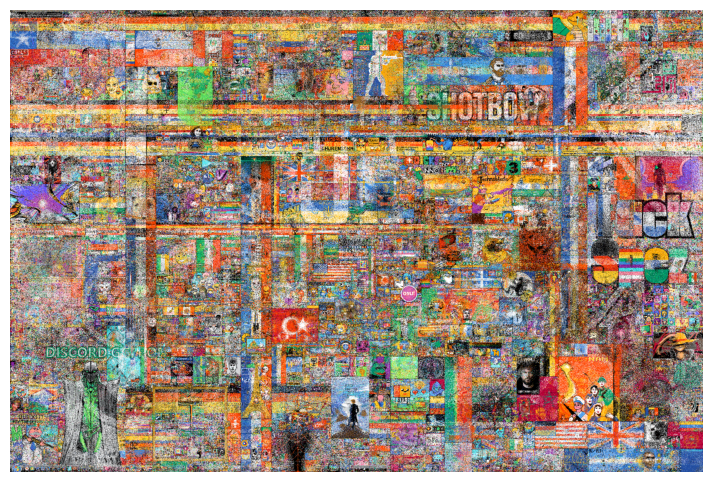

end  138.0718846321106


In [27]:
import pandas as pd
fig = plt.figure(figsize=(10, 6))
print(len(timestamps))
st=time.time()
ani = animation.FuncAnimation(fig, update, frames=len(timestamps), repeat=False)
et=time.time()
print("ani func",et-st)
st=time.time()
print("mp4 save start")
spark.stop()
mp4_save_loc=currDir+'/animated_canvas.mp4'
ani.save(mp4_save_loc,writer="ffmpeg",fps=30,extra_args=["-vcodec", "libx264"])
print("ani save done")
plt.show()
et=time.time()
print("end ",et-st)